# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN, Dropout, Embedding
from keras import Sequential
from keras.optimizers import Adam

### 1.1 Generating dataset

In [12]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [13]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [14]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [15]:
no_training_epochs = 5

### 1.3 Data examination

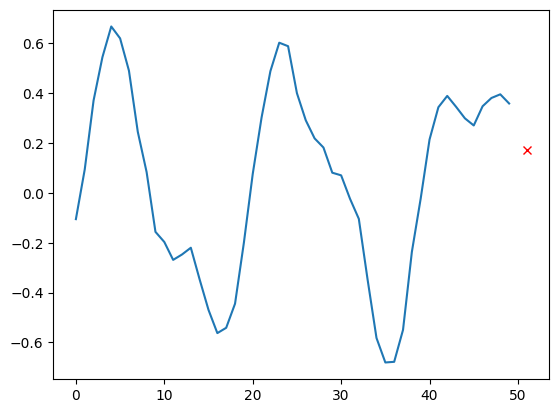

In [16]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [17]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [18]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [19]:
model_linear.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 2s 6ms/step - loss: 0.2065 - mean_squared_error: 0.2065 - val_loss: 0.0642 - val_mean_squared_error: 0.0642
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0115 - val_mean_squared_error: 0.0115


In [21]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

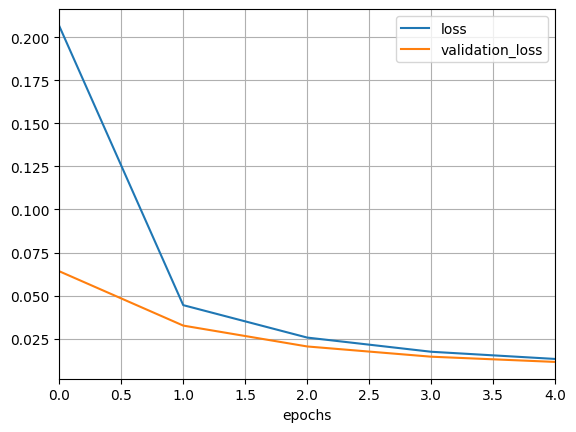

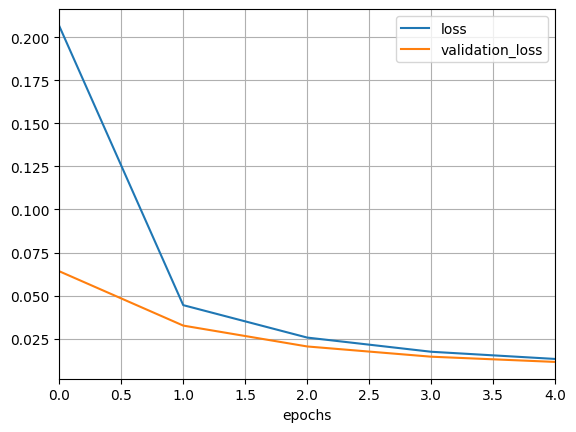

In [28]:
plot_function(history_linear)

In [23]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.01122142281383276
Test MSE:  0.01122142281383276


### 1.5 Simple RNN Model

In [24]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [25]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [26]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
 34/219 [===>..........................] - ETA: 7s - loss: 0.0853 - mean_squared_error: 0.0853

KeyboardInterrupt: 

In [ ]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [ ]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [ ]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

In [ ]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

In [ ]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [29]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [30]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [31]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [32]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [33]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [34]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [52]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [54]:
optimizer = Adam(learning_rate = 0.001)

In [38]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 158s 248ms/step - loss: 0.7012 - accuracy: 0.4974 - val_loss: 0.6945 - val_accuracy: 0.4938
Epoch 2/5
625/625 [==============================] - 136s 218ms/step - loss: 0.6958 - accuracy: 0.4961 - val_loss: 0.7014 - val_accuracy: 0.4938
Epoch 3/5
625/625 [==============================] - 135s 216ms/step - loss: 0.6953 - accuracy: 0.4999 - val_loss: 0.6936 - val_accuracy: 0.5062
Epoch 4/5
625/625 [==============================] - 134s 214ms/step - loss: 0.6969 - accuracy: 0.4992 - val_loss: 0.6934 - val_accuracy: 0.5062
Epoch 5/5
625/625 [==============================] - 133s 213ms/step - loss: 0.6958 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5062


In [41]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6932804584503174
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

## LTSM

In [38]:
embed_size = 128
vocabulary_size = 3000

model = Sequential([
    Embedding(input_dim=1000, output_dim=128, input_shape=[150]),
    LSTM(units=128, return_sequences=True),
    LSTM(units=128),
    Dense(units=1, activation='sigmoid')
])

optimizer = Adam(learning_rate = 0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Epoch 1/5
625/625 [==============================] - 37s 55ms/step - loss: 0.6729 - accuracy: 0.5695 - val_loss: 0.6291 - val_accuracy: 0.6656
Epoch 2/5
625/625 [==============================] - 14s 23ms/step - loss: 0.6486 - accuracy: 0.6139 - val_loss: 0.5278 - val_accuracy: 0.7494
Epoch 3/5
625/625 [==============================] - 12s 20ms/step - loss: 0.4879 - accuracy: 0.7751 - val_loss: 0.4442 - val_accuracy: 0.8074
Epoch 4/5
625/625 [==============================] - 11s 18ms/step - loss: 0.4136 - accuracy: 0.8178 - val_loss: 0.4384 - val_accuracy: 0.7982
Epoch 5/5
625/625 [==============================] - 10s 16ms/step - loss: 0.3891 - accuracy: 0.8283 - val_loss: 0.4029 - val_accuracy: 0.8244
Test loss: 0.3895094394683838
Test accuracy:  82.52000212669373 %


## GRU

In [37]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(126, return_sequences=True),
    keras.layers.GRU(126),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Epoch 1/5
625/625 [==============================] - 39s 58ms/step - loss: 0.6332 - accuracy: 0.6119 - val_loss: 0.4626 - val_accuracy: 0.7842
Epoch 2/5
625/625 [==============================] - 14s 23ms/step - loss: 0.4121 - accuracy: 0.8133 - val_loss: 0.3894 - val_accuracy: 0.8272
Epoch 3/5
625/625 [==============================] - 11s 18ms/step - loss: 0.3636 - accuracy: 0.8408 - val_loss: 0.3916 - val_accuracy: 0.8256
Epoch 4/5
625/625 [==============================] - 10s 17ms/step - loss: 0.3309 - accuracy: 0.8558 - val_loss: 0.3728 - val_accuracy: 0.8356
Epoch 5/5
625/625 [==============================] - 10s 16ms/step - loss: 0.3056 - accuracy: 0.8666 - val_loss: 0.3922 - val_accuracy: 0.8272
Test loss: 0.3779194951057434
Test accuracy:  83.13199877738953 %
